In [1]:
%pylab notebook

import os, commands
IW2D_path=commands.getoutput("echo $IW2D_PATH");
print IW2D_path

from Impedance import *

Populating the interactive namespace from numpy and matplotlib


# Example from SLS-II 
Their copper vacuum chamber has rounded geometry with inner radius of 10 mm and a thickness of 
NEG coating is, say 2um.  They are using a DC resistivity for NEG of 9.1e-7 Ohm*m and 
for copper of 1.68e-8 Ohm*m. The thickness of the copper chamber is 1mm.

We calculated the longitudinal impedance up to 100THz and the transverse impedance up to 
1THz for comparison with Impedanacewake2D.

<IPython.core.display.Javascript object>


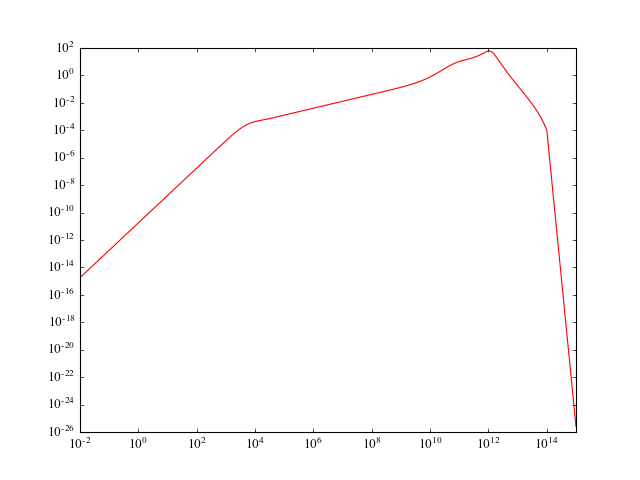

In [22]:
# Pipe geometry
L=1.
Rin=10e-3;

# Pipe materials
neg_lay=layer(rhoDC=9.1e-7,tau=0, epsb=1, mur=1, fmu=inf, thickness=2e-6)
cu_lay=layer(rhoDC=1.68e-8, tau=0, epsb=1, mur=1, fmu=inf, thickness=1e-3)
vac_lay=vacuum_layer(thickness=np.inf)
pipe=construct_layers([neg_lay,cu_lay,vac_lay])

# Frequency range
freq=freq_param(fmin=1e2,fmax=1e14,ftypescan=2,nflog=20)

# LXPLUS / Local config
lxbatchImp=None
queue='1nh'

machine='SLSII'
dire=machine+'/' # in IW2D_path
os.system('mkdir -p '+dire)
iw_input=impedance_wake_input(machine=machine,b=[Rin],layers=pipe,fpar=freq,geometry='round')
imp,[]=imp_model_from_IW2D(iw_input,wake_calc=False,path=IW2D_path,flagrm=True, 
                           lxplusbatch=lxbatchImp,queue=queue,dire=dire);

# Multiply by device length
multiply_impedance_wake(imp,L)

# Select component
a,b,c,d,plane,wakeflag=identify_component('Zlong')
for imp_comp in imp:
    if test_impedance_wake_comp(imp_comp, a, b, c, d, plane):
        Zl=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
        freq=imp_comp.var
        
# Aplot     
figure(1)
loglog(freq,real(Zl),'-r')        

# Example from LHC TDI 
A flat 2 jaws structure with 2mu m coating of Copper on .1mu m Titanium on a Graphite bulk


In [ ]:
block_scenario='LHC_TDI/'

# Jaw geometry
hgap=np.array([3.8])*1e-3
rhoDC_cu=27e-9
thick_cu=2e-6
thick_ti=.1e-6
thick_C=54e-3
L=2.8

# LXPLUS
lxbatchImp=None
queue='1nh'

# Frequency range
freq=freq_param(fmin=1e3,fmax=2e9,ftypescan=2,nflog=20,fadded=[],fmaxrefine=1e7,fminrefine=1.1e7,nrefine=1)

# Materials
Cu_lay=layer(rhoDC=rhoDC_cu,tau=0.027e-12,epsb=1,mur=1,fmu=np.inf,thickness=thick_cu);
Ti_lay=Ti_layer(thickness=thick_ti)
C_lay=graphite_layer(thickness=thick_C)
vac_lay=vacuum_layer(thickness=np.inf)
jaw=construct_layers([Cu_lay,Ti_lay,C_lay,vac_lay])
comment='_HG%.1fmm_rhoDC%.1f'%(hgap*1e3,rhoDC_cu*1e9)

imp_TDI=[];
dire=block_scenario+'/%.1f/'%(hgap*1e3);
iw_input=impedance_wake_input(machine='LHC',b=[hgap],layers=jaw,fpar=freq,geometry='flat',comment=comment)
iw_block,[]=imp_model_from_IW2D(iw_input,wake_calc=False,path=IW2D_path,flagrm=True, 
                                lxplusbatch=lxbatchImp,queue=queue,dire=dire);

# Optics parameters
betav=71.;
betax_TDI=100;
betay_TDI=46;


# Multiply by device length
multiply_impedance_wake(iw_block,L)

# Multiply by beta functions
add_impedance_wake(imp_TDI, iw_block, betax_TDI/betav, betay_TDI/betav)

# Select component
a,b,c,d,plane,wakeflag=identify_component('Zydip')
for imp_comp in imp:
    if test_impedance_wake_comp(imp_comp, a, b, c, d, plane):
        Zy=imp_comp.func[:,0]+1j*imp_comp.func[:,1]
        freq=imp_comp.var
        
# A plot     
figure(2)
loglog(freq,imag(Zy),'-r')    

## Ask for help!

In [ ]:
layer?